# Fashion Dataset Image Classification

#### The goal of this project is to build convolutional neural networks to classify images.

The data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## The Data

Load Data

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

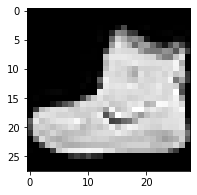

In [6]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[0],cmap='gray')

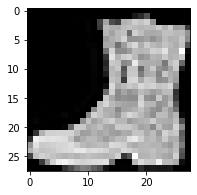

In [7]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[150],cmap='gray')

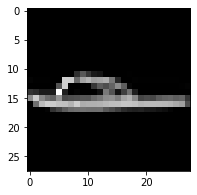

In [8]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[30],cmap='gray')

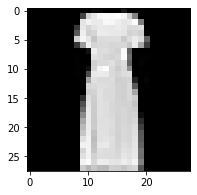

In [9]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[50],cmap='gray')

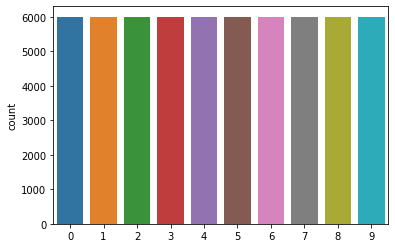

In [10]:
sns.countplot(y_train)

## Preprocessing the Data

We normalize the X train and X test data by dividing by the max value of the image arrays

In [11]:
x_train.max()

255

In [0]:
x_train= x_train/255
x_test= x_test/255

In [13]:
x_test.max()

1.0

We reshape the X arrays to include a 4 dimension of the single channel.

In [14]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test =  x_test.reshape(10000, 28, 28, 1)

Then we convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

## Building the Model

We use Keras to create a model

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [0]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


## Train The Model

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop= EarlyStopping(monitor='val_loss', mode='min',patience=10,verbose=1)

In [24]:
model.fit(x_train,y_train,epochs=100,verbose=1,callbacks=[early_stop],validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 14s 230us/sample - loss: 0.3984 - accuracy: 0.8569 - val_loss: 0.3259 - val_accuracy: 0.8840
Epoch 2/100
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2752 - accuracy: 0.9003 - val_loss: 0.3038 - val_accuracy: 0.8908
Epoch 3/100
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2386 - accuracy: 0.9137 - val_loss: 0.2809 - val_accuracy: 0.9010
Epoch 4/100
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2133 - accuracy: 0.9232 - val_loss: 0.2843 - val_accuracy: 0.9024
Epoch 5/100
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1944 - accuracy: 0.9305 - val_loss: 0.2786 - val_accuracy: 0.9038
Epoch 6/100
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1784 - accuracy: 0.9361 - val_loss: 0.2862 - val_accuracy: 0.9057
Epoch 7/100
60000/60000 [==================

## Evaluate Model

In [0]:
losses = pd.DataFrame(model.history.history)

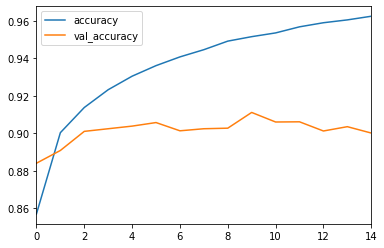

In [26]:
losses[['accuracy','val_accuracy']].plot()

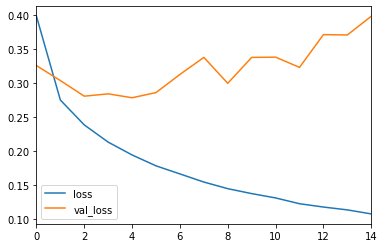

In [27]:
losses[['loss','val_loss']].plot()

In [29]:
print(model.metrics_names)
print(model.evaluate(x_test,y_test,verbose=0))

['loss', 'accuracy']
[0.3983847061634064, 0.9001]


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
(_,_), (_, y_test_class) = fashion_mnist.load_data()

In [35]:
predictions = model.predict_classes(x_test)
print(classification_report(y_test_class,predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.89      0.81      0.85      1000
           3       0.89      0.93      0.91      1000
           4       0.82      0.86      0.84      1000
           5       0.98      0.96      0.97      1000
           6       0.74      0.70      0.72      1000
           7       0.97      0.93      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.93      0.98      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



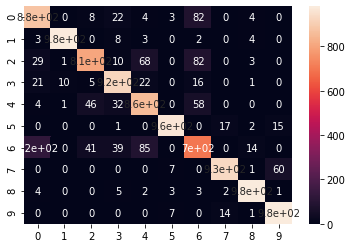

In [36]:
sns.heatmap(confusion_matrix(y_test_class,predictions),annot=True)

## Improve Model

In [0]:
model2= Sequential()

model2.add(Conv2D(32, [3,3], strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model2.add(Conv2D(32, [3,3], strides=(1, 1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(64, [3,3], strides=(1, 1), padding='same', activation='relu'))
model2.add(Conv2D(64, [3,3], strides=(1, 1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, [3,3], strides=(1, 1), padding='same', activation='relu'))
model2.add(Conv2D(128, [3,3], strides=(1, 1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

### Training the Model

In [0]:
early_stop= EarlyStopping(monitor='val_loss', mode='min',patience=3,verbose=1)

In [40]:
model2.fit(x_train,y_train,epochs=10,verbose=1,callbacks=[early_stop],validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 232us/sample - loss: 0.4882 - accuracy: 0.8195 - val_loss: 0.3270 - val_accuracy: 0.8776
Epoch 2/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.3062 - accuracy: 0.8864 - val_loss: 0.2641 - val_accuracy: 0.9020
Epoch 3/10
60000/60000 [==============================] - 13s 217us/sample - loss: 0.2621 - accuracy: 0.9038 - val_loss: 0.2555 - val_accuracy: 0.9036
Epoch 4/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.2391 - accuracy: 0.9129 - val_loss: 0.2338 - val_accuracy: 0.9152
Epoch 5/10
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2228 - accuracy: 0.9169 - val_loss: 0.2301 - val_accuracy: 0.9189
Epoch 6/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.2100 - accuracy: 0.9225 - val_loss: 0.2160 - val_accuracy: 0.9248
Epoch 7/10
60000/60000 [====================

### Evaluating the Model


In [0]:
losses2 = pd.DataFrame(model2.history.history)

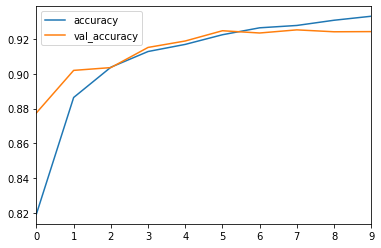

In [42]:
losses2[['accuracy','val_accuracy']].plot()

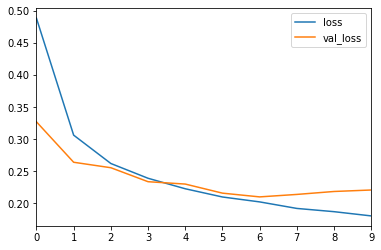

In [43]:
losses2[['loss','val_loss']].plot()

In [45]:
print(model2.metrics_names)
print(model2.evaluate(x_test,y_test,verbose=0))

['loss', 'accuracy']
[0.22087601847052574, 0.9243]


In [46]:
predictions2 = model2.predict_classes(x_test)
print(classification_report(y_test_class,predictions2))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1000
           1       1.00      0.99      0.99      1000
           2       0.90      0.89      0.89      1000
           3       0.92      0.92      0.92      1000
           4       0.88      0.87      0.88      1000
           5       0.99      0.99      0.99      1000
           6       0.74      0.82      0.78      1000
           7       0.97      0.97      0.97      1000
           8       0.98      0.99      0.99      1000
           9       0.98      0.97      0.98      1000

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



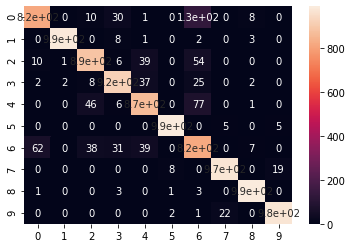

In [47]:
sns.heatmap(confusion_matrix(y_test_class,predictions2),annot=True)

## Compare Models

In [48]:
print('First Model:    ',model.evaluate(x_test,y_test,verbose=0))
print('Improved Model: ',model2.evaluate(x_test,y_test,verbose=0))

First Model:     [0.3983847061634064, 0.9001]
Improved Model:  [0.22087601847052574, 0.9243]
